In [2]:
import numpy as py
import csv as csv
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cityFile = "city_data.csv"
rideFile = "ride_data.csv"
cityData = pd.read_csv(cityFile)
rideData = pd.read_csv(rideFile)
cityData.set_index("city", inplace = True)


In [4]:
avgFare = rideData.groupby(['city'])['fare'].mean()
numRides = rideData['city'].value_counts().sort_index()
numDrivers = []
demo = []
for index in avgFare.index:
    numDrivers.append(cityData.loc[index,'driver_count']* 5)
    if(cityData.loc[index,'type'] == 'Urban'):
        demo.append("gold")
    elif(cityData.loc[index,'type'] == 'Suburban'):
        demo.append("lightskyblue")
    else:
        demo.append("lightcoral")


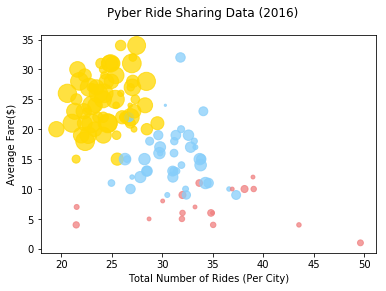

In [5]:
plt.xlabel("Total Number of Rides (Per City)") 
plt.ylabel("Average Fare($)") 
plt.suptitle("Pyber Ride Sharing Data (2016)")
plt.scatter(avgFare, numRides, s = numDrivers,c=demo, alpha = .75)


In [6]:
labels = 'Rural', 'Suburban', 'Urban'
colors = ['lightcoral', 'lightskyblue', 'gold']
totalFare = [0,0,0]
totalRides = [0,0,0]
totalDrivers = [0,0,0]

for i in rideData.index:
    if(cityData.loc[rideData.loc[i,'city'],'type'] == "Rural"):
        totalFare[0] += rideData.loc[i,'fare']
        totalRides[0] += 1
    elif(cityData.loc[rideData.loc[i,'city'],'type'] == "Suburban"):
        totalFare[1] += rideData.loc[i,'fare']
        totalRides[1] += 1
    else:
        totalFare[2] += rideData.loc[i,'fare']
        totalRides[2] += 1

for i in cityData.index:
    if(cityData.loc[i,'type'] == "Rural"):
        totalDrivers[0] += cityData.loc[i,'driver_count']
    elif(cityData.loc[i,'type'] == "Suburban"):
        totalDrivers[1] += cityData.loc[i,'driver_count']
    else:
        totalDrivers[2] += cityData.loc[i,'driver_count']


([<matplotlib.patches.Wedge at 0x1fb946ede48>,
 [Text(1.07583,0.229323,'Rural'),
  Text(0.215632,1.07866,'Suburban'),
  Text(-0.435767,-1.01,'Urban')],
 [Text(0.586817,0.125085,'6.7%'),
  Text(0.117617,0.588359,'30.3%'),
  Text(-0.237691,-0.550911,'63.0%')])

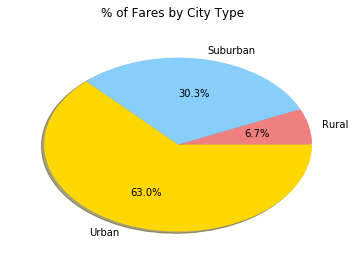

In [7]:
plt.suptitle("% of Fares by City Type")        
plt.pie(totalFare, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)

([<matplotlib.patches.Wedge at 0x1fb94735c88>,
 [Text(1.085,0.181054,'Rural'),
  Text(0.441865,1.00735,'Suburban'),
  Text(-0.601643,-0.920883,'Urban')],
 [Text(0.591817,0.0987568,'5.3%'),
  Text(0.241017,0.549464,'26.3%'),
  Text(-0.328169,-0.5023,'68.4%')])

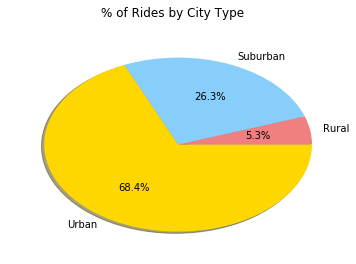

In [8]:
plt.suptitle("% of Rides by City Type")        
plt.pie(totalRides, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)

([<matplotlib.patches.Wedge at 0x1fb94787128>,
 [Text(1.09477,0.107145,'Rural'),
  Text(0.771407,0.784176,'Suburban'),
  Text(-0.844121,-0.705308,'Urban')],
 [Text(0.597147,0.0584427,'3.1%'),
  Text(0.420767,0.427732,'19.1%'),
  Text(-0.46043,-0.384714,'77.8%')])

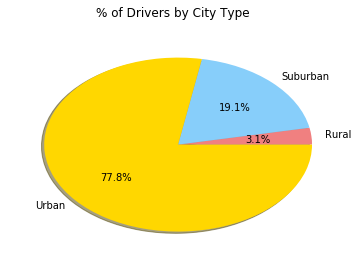

In [9]:
plt.suptitle("% of Drivers by City Type")        
plt.pie(totalDrivers, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)